     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
60000 784
(784,)
(784, 784)


<ipython-input-2-ba7f7b7b7c92>:59: ComplexWarning: Casting complex values to real discards the imaginary part
  pc = pc.astype("float32")


(3428445.433070633+0j)
[ 9.70466436e+00+0.0000000e+00j  7.09592406e+00+0.0000000e+00j
  6.16908876e+00+0.0000000e+00j  5.38941949e+00+0.0000000e+00j
  4.86879702e+00+0.0000000e+00j  4.31223132e+00+0.0000000e+00j
  3.27192995e+00+0.0000000e+00j  2.88389545e+00+0.0000000e+00j
  2.76202940e+00+0.0000000e+00j  2.35700055e+00+0.0000000e+00j
  2.10918962e+00+0.0000000e+00j  2.02299108e+00+0.0000000e+00j
  1.71581820e+00+0.0000000e+00j  1.69211143e+00+0.0000000e+00j
  1.57864128e+00+0.0000000e+00j  1.48295261e+00+0.0000000e+00j
  1.32456095e+00+0.0000000e+00j  1.27689737e+00+0.0000000e+00j
  1.18726294e+00+0.0000000e+00j  1.15268370e+00+0.0000000e+00j
  1.06616621e+00+0.0000000e+00j  1.00671337e+00+0.0000000e+00j
  9.53573327e-01+0.0000000e+00j  9.12543746e-01+0.0000000e+00j
  8.83404692e-01+0.0000000e+00j  8.39319141e-01+0.0000000e+00j
  8.12578809e-01+0.0000000e+00j  7.86366084e-01+0.0000000e+00j
  7.44733102e-01+0.0000000e+00j  6.90859128e-01+0.0000000e+00j
  6.58093773e-01+0.0000000e+00j 

<ipython-input-2-ba7f7b7b7c92>:69: ComplexWarning: Casting complex values to real discards the imaginary part
  pc = pc.astype("float32")
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


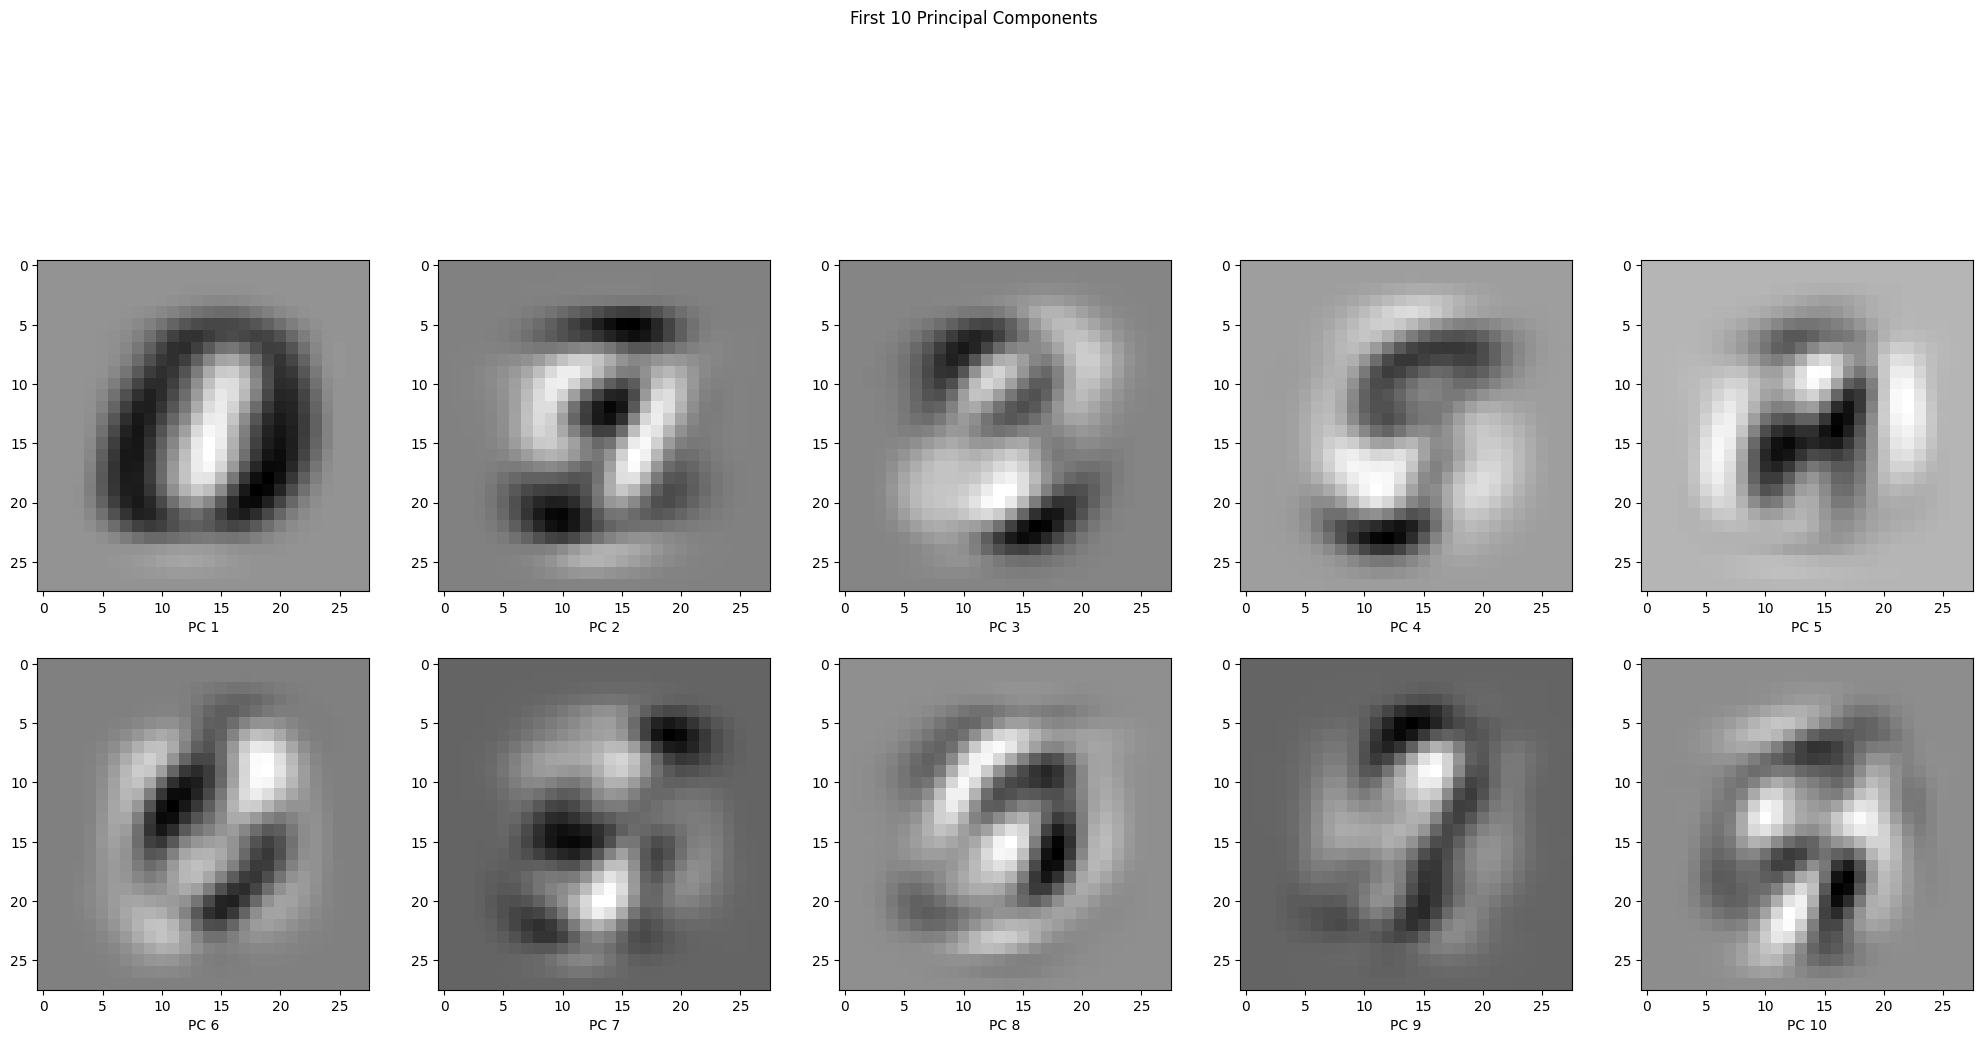

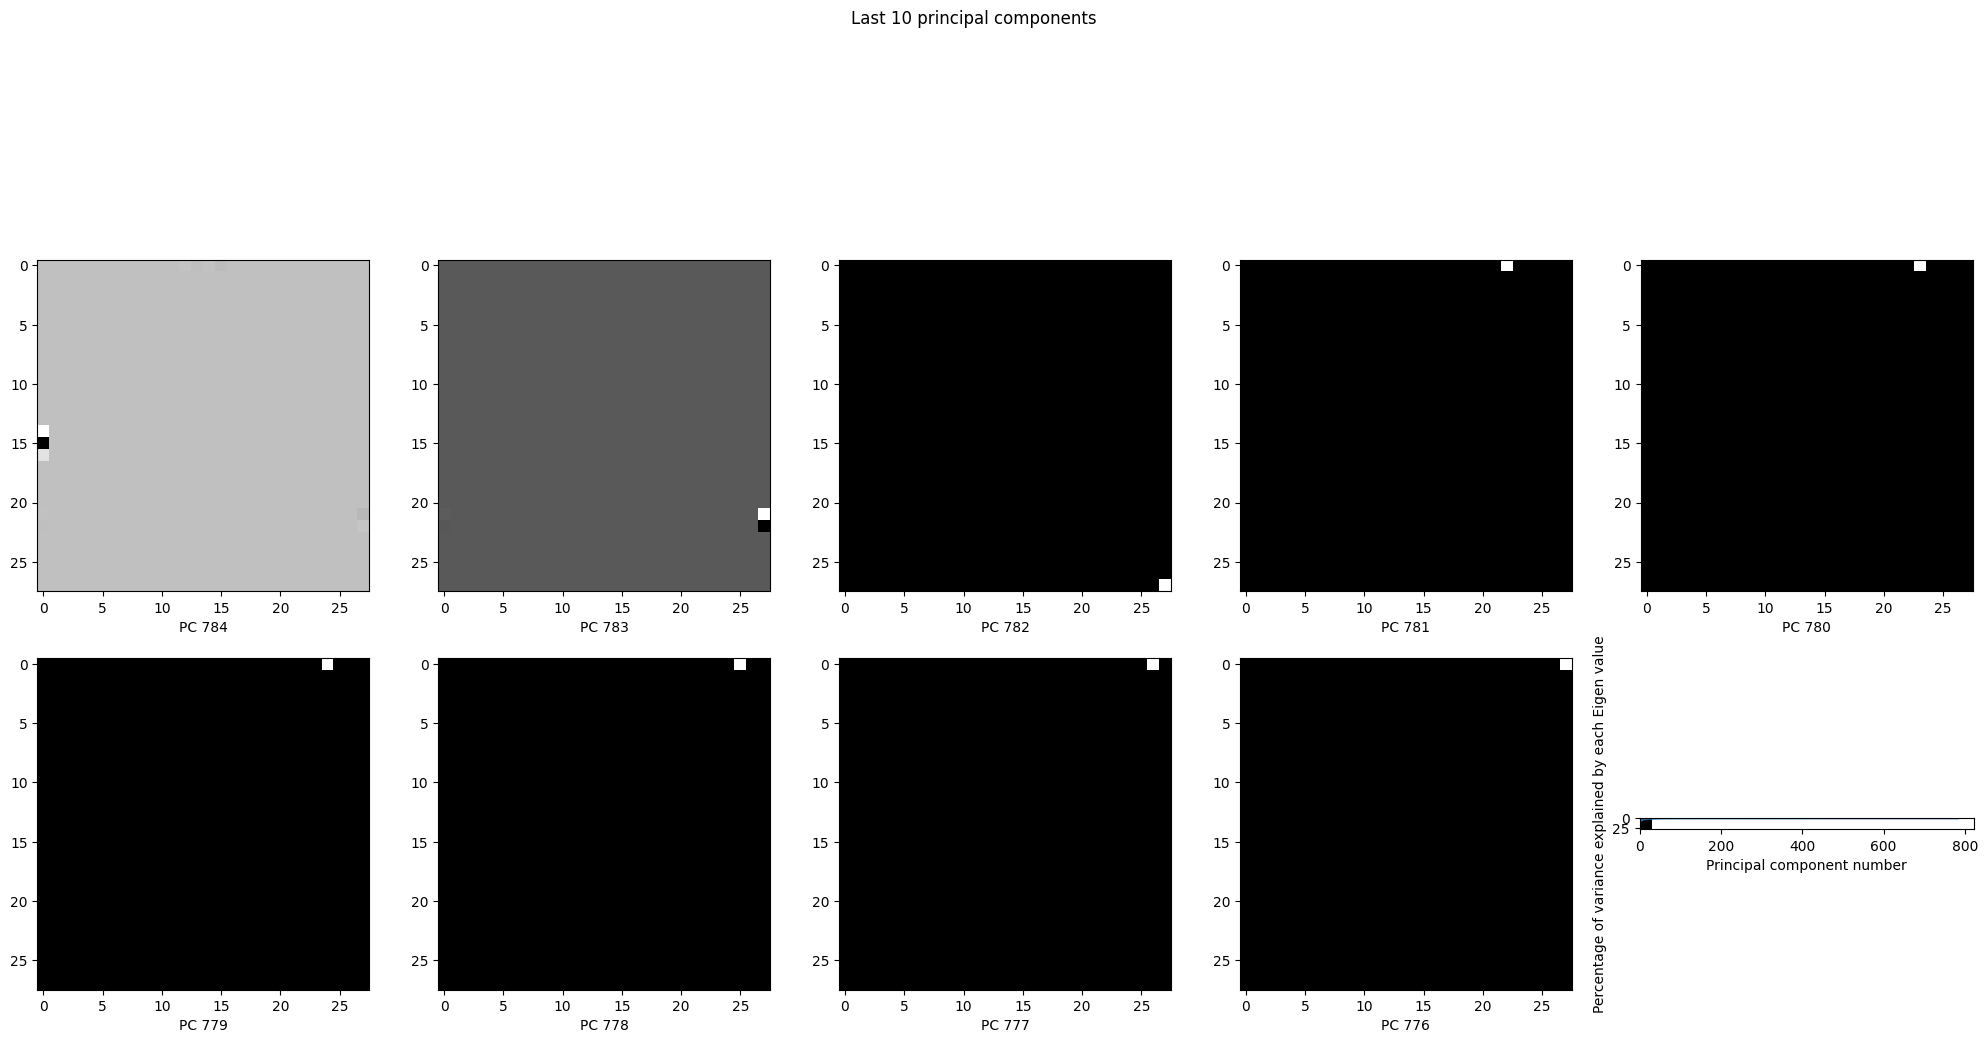

(0.9483564188145829+0j)


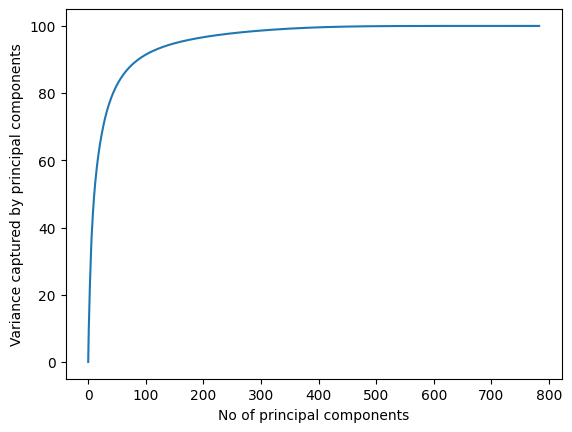

(784, 10)


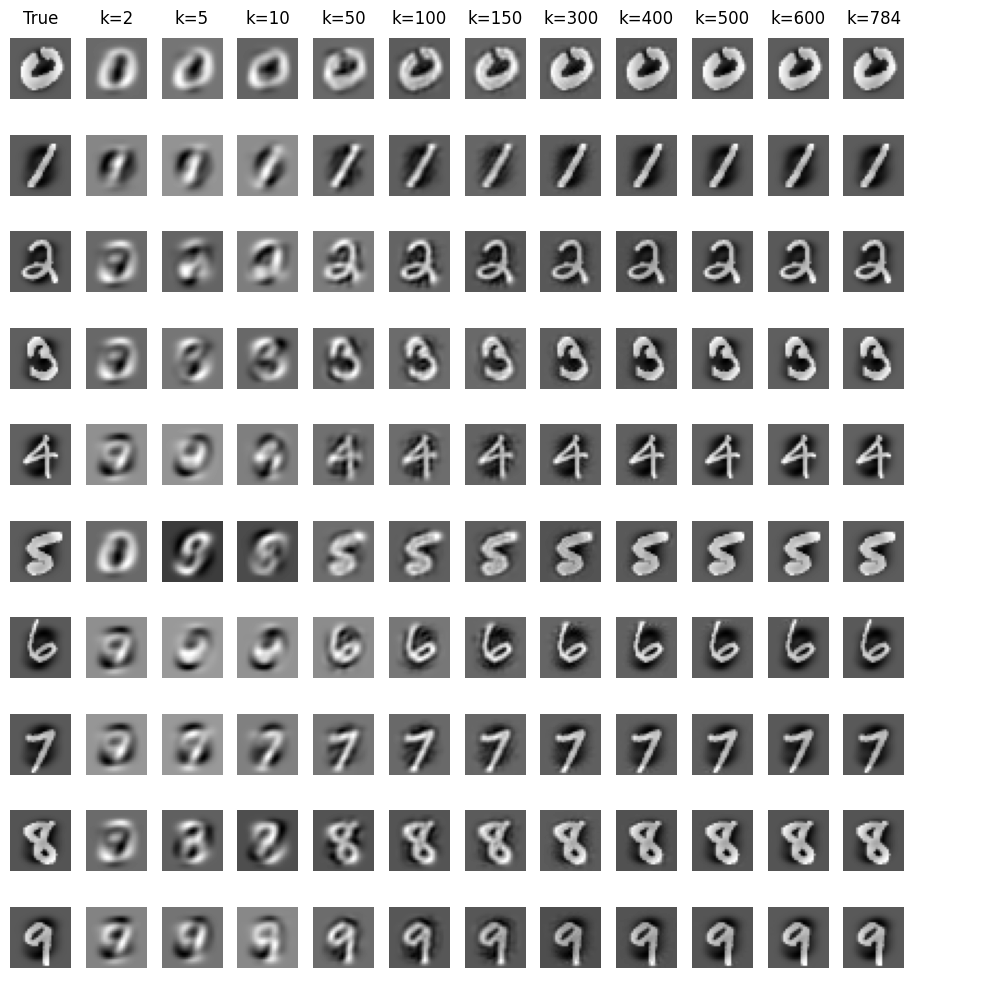

In [2]:
!pip install datasets
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
#load train and test dataset
from datasets import list_datasets, load_dataset

dataset_train = load_dataset("mnist", split="train")
dataset_test = load_dataset("mnist", split="test")
#convert to numpy arrays
dataset_train.set_format("np")
dataset_test.set_format("np")
dataset_train
#reshape the numpy arrays
train_images = dataset_train['image']
print(train_images.shape)
test_images = dataset_test['image']
print(test_images.shape)
train_images = train_images.reshape(60000,784)
print(train_images.shape)
test_images = test_images.reshape(10000,784)
print(test_images.shape)
train_labels = dataset_train['label']
test_labels = dataset_test['label']

train_images = train_images.astype("float64")
test_images = test_images.astype("float64")
#find the mean of the train images
train_mean = np.mean(train_images, axis=0)
#center the data
train_centered = train_images - train_mean
test_centered = test_images - train_mean

# now the dataset is of dimension 60000*784. Reshape the dataset to 784*60000
X = np.transpose(train_centered)
X_transpose = train_centered
X_test = np.transpose(test_centered)
N = X.shape[1] #no of train datapoints
D = X.shape[0] #dimension size
print(N,D)
#Compute covariance matrix XX^T/N
cov_matrix = np.matmul(X,X_transpose )/N
cov_matrix.shape
#Find the eigen vectors of covariance matrix
eig_values, eig_vectors = LA.eig(cov_matrix)
print(eig_values.shape)
print(eig_vectors.shape)
#sort the eigen values and corresponding vectors in descending order
idx = eig_values.argsort()[::-1]
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx] #here each column is an eigen vetor

#First 10 principal components
plt.figure(figsize=(25,25))

for i in range(10): # 0-9
    pc_plot = plt.subplot(5,5, i + 1) # 2x5 plot
    pc = eig_vectors[:,i].reshape(28,28)
    pc = pc.astype("float32")
    pc_plot.imshow(pc, cmap="gray")
    pc_plot.set_xlabel(f'PC {i+1}')

plt.suptitle('First 10 Principal Components');
plt.figure(figsize=(25,25))
j=D
for i in range(10): # 0-9
    pc_plot = plt.subplot(5, 5, i + 1) # 5x5 plot
    pc = eig_vectors[:,j-1].reshape(28,28)
    pc = pc.astype("float32")
    pc_plot.imshow(pc, cmap="gray")
    pc_plot.set_xlabel(f'PC {j}')
    j=j-1

plt.suptitle('Last 10 principal components');
# The variance captured by i-th principal component = i-th eigen value/sum of all eigen values
eig_values_sum = np.sum(eig_values)
print(eig_values_sum)
variance_captured = eig_values *100/eig_values_sum
print(variance_captured)
#plot the variance explained by each eigen value vs no of principal components
pc_nos = np.arange(D)
var_eig = []
for i in range(D):
    var_eig.append(eig_values[i]*100/sum(eig_values))
plt.plot(pc_nos,var_eig)

plt.xlabel("Principal component number")
plt.ylabel("Percentage of variance explained by each Eigen value")

plt.show()
#From the graph, most of the variance is captured by first 100 eigen values
#the percentage of variance captured
K = 150
var_captured = sum(eig_values[:K])/sum(eig_values)
print(var_captured)
#graph  of varaince captured by k PC components
var_percent = []
for i in range(D):
    var_percent.append(sum(eig_values[:i]*100)/sum(eig_values))
plt.plot(pc_nos, var_percent)

plt.xlabel("No of principal components")
plt.ylabel("Variance captured by principal components")

plt.show()
def image_reconstruct(K, img_indices):
    #Project the datapoints to k  principal component directions
    #the new representation of data points will be matmul(eig_vectors[:k]^T,X)
    W = eig_vectors[:,:K]#first K PC
    #print(W.shape)
    X_new = np.matmul(np.transpose(W),X)
    #print(X_new.shape)
    #Reconstruct the images X_recon =  WX_new
    X_recon = np.matmul(W, X_new)
    #print(X_recon.shape)
    #get the class labels
    labels_unique = np.unique(train_labels)

    #get the images from train set
    images_unique = np.transpose(X[:,img_indices])
    #print(images_unique.shape)
    images_unique = np.reshape(images_unique, (-1, 28, 28))
    #print(images_unique.shape)

    #get the corresponding reconstructed images
    recon_images_unique = np.transpose(X_recon[:,img_indices])
    #print(recon_images_unique.shape)
    recon_images_unique = np.reshape(recon_images_unique, (-1, 28, 28))
    #print(recon_images_unique.shape)

    return recon_images_unique


def image_reconstruct(K, x_test):
    #Project the datapoints to k  principal component directions
    #the new representation of data points will be matmul(eig_vectors[:k]^T,X)
    W = eig_vectors[:,:K]#first K PC
    #print(W.shape)
    X_new = np.matmul(np.transpose(W),x_test)
    #print(X_new.shape)
    #Reconstruct the images X_recon =  WX_new
    X_recon = np.matmul(W, X_new)
    #print(X_recon.shape)


    #get the corresponding reconstructed images
    recon_images_unique = np.transpose(X_recon)
    #print(recon_images_unique.shape)
    recon_images_unique = np.reshape(recon_images_unique, (-1, 28, 28))
    #print(recon_images_unique.shape)

    return recon_images_unique


#get the class labels
labels_unique = np.unique(test_labels)

#Plot the reconstructed images for various dimensions
#find a random image index for each class labels
img_ids = [np.where(test_labels == l)[0][np.random.randint(0, len(np.where(test_labels == l)[0]))] for l in labels_unique]
#get the images from test set
images_unique = X_test[:,img_ids]
print(images_unique.shape)

k_dims = [1,2,  5,10, 50, 100, 150, 300,400, 500, 600, 784 ]
#k_dims =[1, 2, 5]
img_recons = []
for i in k_dims:
    img_recons.append(image_reconstruct(i, images_unique))

images_unique = np.transpose(images_unique)
images_unique = np.reshape(images_unique, (-1, 28, 28))
#print(images_unique.shape)
cols = ['K={}'.format(i) for i in k_dims]
cols.insert(0, "Original")

#plot the original and reconstructed images
fig, ax = plt.subplots(nrows=10, ncols=len(k_dims)+1, figsize=(10, 10)) #fig and axes

# Adding titles to subplot
p=0
for i in range(10): #10 rows
    title = ax[0,0].set_title("True", loc='center', y=1.1)
    ax[i, 0].imshow(images_unique[i],cmap="gray")

    for j in range(1, len(k_dims)):
        ax_ = ax[i,j]
        p = p+1
        if i == 0:

            title = ax_.set_title("k="+str(k_dims[p]), loc='center', y=1.1)

        ax[i, j].imshow(img_recons[j][i].real,cmap="gray")

 # remove ticks and labels from the axes
for i in range(10):
    for j in range(len(k_dims)+1):
        ax[i, j].axis('off')

fig.tight_layout()
plt.show()
